In [1]:
import re
import json
import matplotlib.pyplot as plt
import numpy as np
from word2number.w2n import word_to_num

### preprocessing

In [2]:
MAX_DIGITS = 7

In [3]:
word_form = []
number_form = []

with open('gemini_response/numeration_word2num_response.txt','r') as file:
    for line in file:
        # remove newline character
        line = line.strip()

        # split the line into word form and number form
        word_form.append(line.split('=')[0].strip())
        number_form.append(line.split('=')[1].strip())

print('Number of responses:', len(word_form))

Number of responses: 5000


### evaluation

In [4]:
def num_digits(num):
    return len(str(num).split('.')[0].replace('-','').replace(',',''))  

def is_correct(string,num):
    '''
    string: the word form of the number (str)
    num: the number form of the number (int/float)
    '''
    # remove commas from the string
    string = string.replace(',','')
    # get sign of the number
    sign = string.startswith('minus')
    # convert the number
    converted = ((-1)**sign)* word_to_num(string)

    return abs(converted - num) < 1e-8

In [5]:
total = np.zeros((4,MAX_DIGITS)) # 0 : positive int, 1 : negative int, 2 : positive dec, 3 : negative dec
correct = np.zeros((4,MAX_DIGITS))

for word,num in zip(word_form,number_form):
    # replace ',' with '' in num
    num = num.replace(',','')

    # get sign of the number (0: positive, 1: negative)
    sign = 1 if num[0] == '-' else 0

    # get if num is decimal or int (0: int, 1: decimal)
    type_num = 1 if '.' in num else 0

    # get number of digits
    digits = num_digits(num)

    # convert number from string to int/float
    if type_num == 0:
        num = int(num)
    else:
        num = float(num)
    
    total[2*type_num + sign][digits-1] += 1
    correct[2*type_num + sign][digits-1] += is_correct(word,num)
   

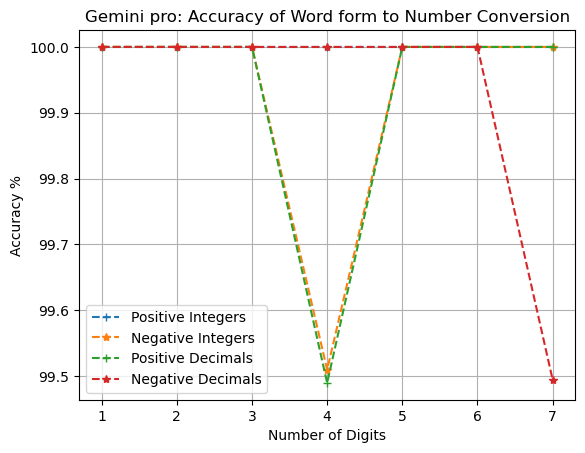

In [6]:
accuracy = correct*100/total

# plot the accuracy
plt.plot(range(1,MAX_DIGITS+1),accuracy[0,:],marker='+',linestyle='--',label='Positive Integers')
plt.plot(range(1,MAX_DIGITS+1),accuracy[1,:],marker='*',linestyle='--',label='Negative Integers')
plt.plot(range(1,MAX_DIGITS+1),accuracy[2,:],marker='+',linestyle='--',label='Positive Decimals')
plt.plot(range(1,MAX_DIGITS+1),accuracy[3,:],marker='*',linestyle='--',label='Negative Decimals')
plt.xlabel('Number of Digits')
plt.ylabel('Accuracy %')
plt.title('Gemini pro: Accuracy of Word form to Number Conversion')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/numeration_word2num_accuracy.png')
plt.show()